<div style="background: linear-gradient(90deg, #00f2ff, #ff00ff); padding: 20px; border-radius: 15px; text-align:center; margin:30px 0; box-shadow: 0 0 20px rgba(0,255,255,0.6);">
  <h1 style="color:black; margin:0; font-size:42px; font-weight:900; text-shadow: 2px 2px 10px white;">
    Instagram Analytics Dashboard 2025
  </h1>
</div>

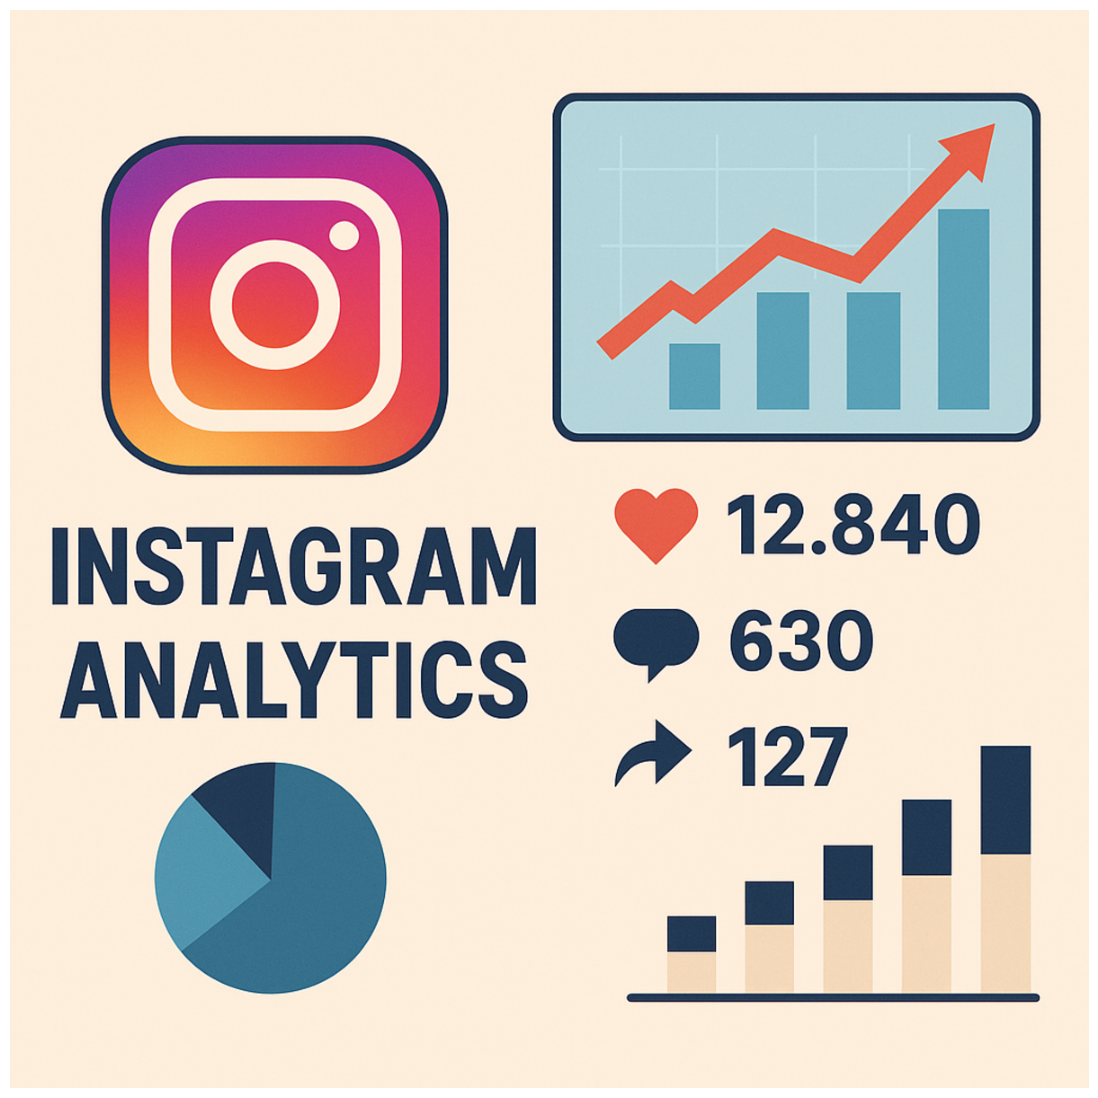

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(r"C:\Users\hp\Pictures\dataset-card.png")
plt.figure(figsize=(22, 14))  
plt.imshow(img)
plt.axis('off')
plt.show()

<div style="background: linear-gradient(90deg, #39ff14, #00f2ff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #39ff14;">
  <h2 style="color:black; margin:0; font-size:28px; font-weight:bold;"> IMPORT LIBRARIES,ALGORITHMS AND METRICS
 </h2>
</div>

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from  xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
from tabulate import tabulate


<div style="background: linear-gradient(90deg, #14ffd8ff, #ff0000ff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #14b5ffff;">
  <h2 style="color:black; margin:0; font-size:28px; font-weight:bold;"> LOAD DATASET
 </h2>
</div>

In [3]:
df=pd.read_csv(r"C:\Users\hp\Downloads\Instagram_Analytics.csv")
df

,post_id,upload_date,media_type,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,traffic_source,engagement_rate,content_category
0,IG0000001,2024-11-30 09:25:22.954916,Reel,31627,7559,4530,6393,615036,1007750,1340,3,899,Home Feed,4.97,Technology
1,IG0000002,2025-08-15 09:25:22.954916,Photo,63206,3490,1680,6809,1237071,1345900,1351,20,805,Hashtags,5.59,Fitness
2,IG0000003,2025-09-11 09:25:22.954916,Reel,94373,3727,1761,8367,1127470,1305369,242,24,758,Reels Feed,8.29,Beauty
3,IG0000004,2025-09-18 09:25:22.954916,Reel,172053,7222,2875,9290,764030,897874,446,11,402,External,21.32,Music
4,IG0000005,2025-03-21 09:25:22.954916,Video,99646,2703,4444,9746,7004,495406,1905,8,155,Profile,23.52,Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,IG0029995,2024-12-18 09:25:22.954916,Video,46046,8354,3847,11095,597992,820688,1254,18,124,Reels Feed,8.45,Travel
29995,IG0029996,2025-05-05 09:25:22.954916,Carousel,67711,3266,458,12380,1908094,2218288,1427,4,310,Hashtags,3.78,Beauty
29996,IG0029997,2025-05-26 09:25:22.954916,Photo,52326,7328,3687,7619,1984066,2447893,713,4,223,Explore,2.90,Photography
29997,IG0029998,2025-08-02 09:25:22.954916,Carousel,158113,5890,2573,6329,1984709,2001092,1341,22,978,Explore,8.64,Technology


| Column Name         | Description                                                                                  |
|---------------------|----------------------------------------------------------------------------------------------|
| `post_id`           | Unique identifier for each Instagram post                                                    |
| `upload_date`       | Exact date and time the post was uploaded (e.g., 2025-01-01 09:25:22)                        |
| `media_type`        | Format of the post: **Reel**, **Photo**, **Video**, or **Carousel** (multi-image/video)       |
| `likes`             | Total number of likes received                                                               |
| `comments`          | Total number of comments                                                                     |
| `shares`            | Number of times the post was shared (DMs, stories, etc.)                                     |
| `saves`             | Number of times users saved the post                                                         |
| `reach`             | Number of unique accounts that viewed the post                                               |
| `impressions`       | Total times the post appeared on screens (includes repeat views)                            |
| `caption_length`    | Character count of the caption                                                               |
| `hashtags_count`    | Number of hashtags used in the caption                                                       |
| `followers_gained`  | Net followers gained/lost on the day of posting                                              |
| `traffic_source`    | Primary source of views: Home Feed, Explore, Hashtags, Reels Feed, Profile, External         |
| `engagement_rate`   | Engagement rate in % → (likes + comments + shares + saves) ÷ reach × 100                    |
| `content_category`  | Content niche: Fitness, Comedy, Music, Technology, Beauty, Travel, Fashion, Food, Lifestyle, Photography |


<div style="background: linear-gradient(90deg, #143fffff, #eeff00ff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #c0ff14ff;">
  <h2 style="color:black; margin:0; font-size:28px; font-weight:bold;">Data preprocessing
 </h2>
</div>

In [4]:
df=df.drop(["post_id"],axis=1)


In [5]:
for x in df:
    print(x)
    print(df[x].unique())
    print(df[x].nunique())

upload_date
['2024-11-30 09:25:22.954916' '2025-08-15 09:25:22.954916'
 '2025-09-11 09:25:22.954916' '2025-09-18 09:25:22.954916'
 '2025-03-21 09:25:22.954916' '2025-05-06 09:25:22.954916'
 '2025-09-21 09:25:22.954916' '2025-01-06 09:25:22.954916'
 '2025-10-13 09:25:22.954916' '2025-03-10 09:25:22.954916'
 '2025-04-09 09:25:22.954916' '2025-05-03 09:25:22.954916'
 '2025-08-23 09:25:22.954916' '2025-04-13 09:25:22.954916'
 '2025-03-16 09:25:22.954916' '2024-12-06 09:25:22.954916'
 '2025-07-11 09:25:22.954916' '2025-01-08 09:25:22.954916'
 '2025-06-20 09:25:22.954916' '2025-06-13 09:25:22.954916'
 '2025-02-11 09:25:22.954916' '2025-10-04 09:25:22.954916'
 '2025-02-26 09:25:22.954916' '2025-03-20 09:25:22.954916'
 '2025-05-08 09:25:22.954916' '2025-02-18 09:25:22.954916'
 '2024-11-29 09:25:22.954916' '2025-10-19 09:25:22.954916'
 '2025-08-01 09:25:22.954916' '2025-07-26 09:25:22.954916'
 '2025-04-25 09:25:22.954916' '2025-05-25 09:25:22.954916'
 '2025-04-17 09:25:22.954916' '2025-09-02 09

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   upload_date       29999 non-null  object 
 1   media_type        29999 non-null  object 
 2   likes             29999 non-null  int64  
 3   comments          29999 non-null  int64  
 4   shares            29999 non-null  int64  
 5   saves             29999 non-null  int64  
 6   reach             29999 non-null  int64  
 7   impressions       29999 non-null  int64  
 8   caption_length    29999 non-null  int64  
 9   hashtags_count    29999 non-null  int64  
 10  followers_gained  29999 non-null  int64  
 11  traffic_source    29999 non-null  object 
 12  engagement_rate   29999 non-null  float64
 13  content_category  29999 non-null  object 
dtypes: float64(1), int64(9), object(4)
memory usage: 3.2+ MB


In [7]:
df.describe()

,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,engagement_rate
count,29999.000000,29999.000000,29999.000000,29999.000000,2.999900e+04,2.999900e+04,29999.000000,29999.000000,29999.000000,29999.000000
mean,99912.661789,5017.781426,2502.912564,7490.124637,9.965616e+05,1.246669e+06,1103.110904,14.887430,502.152805,14.419276
std,57905.967401,2888.404881,1448.320395,4352.546949,5.777906e+05,5.970924e+05,635.991308,9.005811,290.364038,29.660210
min,7.000000,0.000000,0.000000,0.000000,1.650000e+02,5.107000e+03,0.000000,0.000000,0.000000,0.120000
25%,49755.000000,2530.500000,1246.000000,3690.500000,4.936810e+05,7.469585e+05,555.000000,7.000000,251.000000,5.180000
50%,99580.000000,5042.000000,2498.000000,7483.000000,9.921810e+05,1.241026e+06,1100.000000,15.000000,501.000000,9.190000
75%,150225.000000,7518.000000,3768.000000,11294.000000,1.494798e+06,1.749264e+06,1656.000000,23.000000,755.000000,15.670000
max,200000.000000,10000.000000,5000.000000,15000.000000,1.999865e+06,2.497940e+06,2200.000000,30.000000,1000.000000,3259.820000


In [8]:
dt=pd.DataFrame(df.dtypes)
dt["missingval"]=df.isnull().sum()
dt["Nunique"]=df.nunique()
dt["count"]=df.count()
dt=dt.rename(columns={0:"data type"})
dt

,data type,missingval,Nunique,count
upload_date,object,0,366,29999
media_type,object,0,4,29999
likes,int64,0,27858,29999
comments,int64,0,9495,29999
shares,int64,0,4991,29999
saves,int64,0,12943,29999
reach,int64,0,29787,29999
impressions,int64,0,29781,29999
caption_length,int64,0,2201,29999
hashtags_count,int64,0,31,29999


<div style="background: linear-gradient(90deg, #ff1418ff, #00ffb7ff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #e014ffff;">
  <h2 style="color:black; margin:0; font-size:28px; font-weight:bold;">Outlier Ditection
 </h2>
</div>

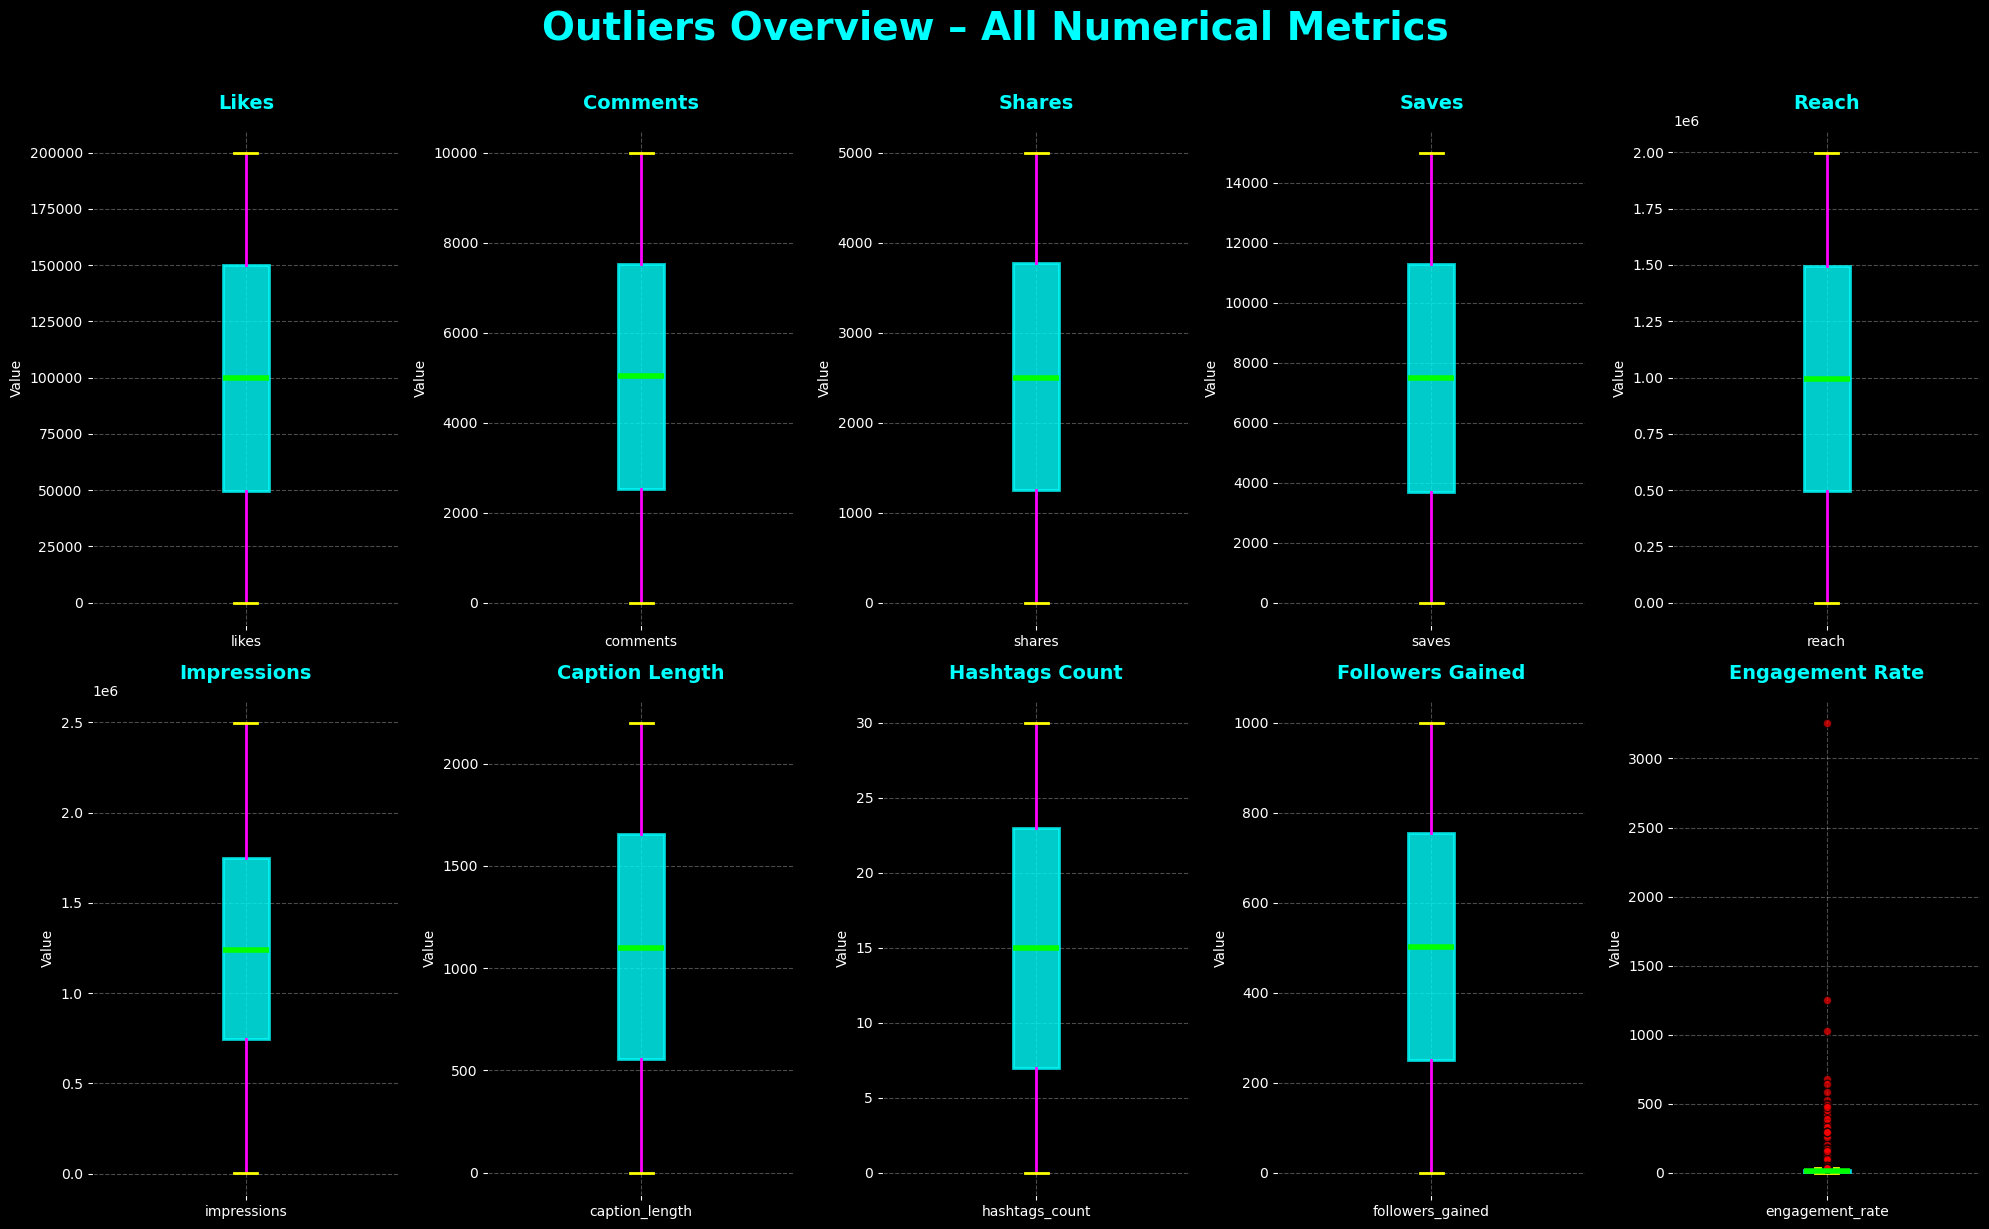

In [9]:

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(20, 12))
plt.suptitle('Outliers Overview – All Numerical Metrics', 
             fontsize=28, fontweight='bold', color='cyan', y=1.02)

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 5, i) 
    
    df.boxplot(column=col, ax=plt.gca(),
               boxprops=dict(facecolor='cyan', color='cyan', linewidth=2, alpha=0.8),
               whiskerprops=dict(color='magenta', linewidth=2),
               capprops=dict(color='yellow', linewidth=2),
               medianprops=dict(color='lime', linewidth=4),
               flierprops=dict(marker='o', markerfacecolor='red', markersize=6, alpha=0.7),
               patch_artist=True)
    
    plt.title(col.replace("_", " ").title(), 
              color='cyan', fontsize=14, fontweight='bold', pad=15)
    plt.ylabel('Value', color='white', fontsize=10)
    plt.grid(True, alpha=0.3, color='white', linestyle='--')
    plt.gca().set_facecolor('black')
    plt.tick_params(colors='white')  

plt.gcf().set_facecolor('black')
plt.tight_layout()
plt.subplots_adjust(top=0.92)  
plt.show()

<div style="background: linear-gradient(90deg, #ff1418ff, #00ffb7ff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #e014ffff;">
  <h2 style="color:black; margin:0; font-size:28px; font-weight:bold;">Clipping
 </h2>
</div>

In [10]:
df['engagement_rate_clean'] = df['engagement_rate'].clip(upper=15)

In [11]:
cliping=["engagement_rate_clean"]

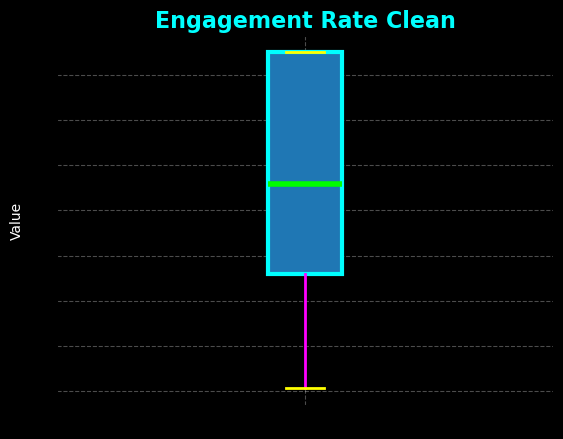

In [12]:
for col in cliping:
    df.boxplot(column=col, 
               boxprops=dict(color='cyan', linewidth=3),
               whiskerprops=dict(color='magenta', linewidth=2),
               capprops=dict(color='yellow', linewidth=2),
               medianprops=dict(color='lime', linewidth=4),
               flierprops=dict(marker='o', markerfacecolor='red', markersize=5, alpha=0.7),
               patch_artist=True)  # This enables beautiful filled boxes
    plt.title(f'{col.replace("_", " ").title()}', color='cyan', fontsize=16, fontweight='bold')
    plt.ylabel('Value', color='white')
    plt.grid(True, alpha=0.3, color='white', linestyle='--')
    plt.gca().set_facecolor('black')
    plt.gcf().set_facecolor('black')
    plt.show()

<div style="background: linear-gradient(90deg, #ff14c0ff, #0088ffff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #14fbffff;">
  <h1 style="color:black; margin:0; font-size:28px; font-weight:bold;">VISUALIZATION</h1>
</div>

<div style="background: linear-gradient(90deg, #39ff14, #00f2ff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #39ff14;">
  <h2 style="color:black; margin:0; font-size:28px; font-weight:bold;">1. Univariate Analysis</h2>
</div>




<h3 style="background-color: #ff0000ff; color: #ffffffff; text-align: left; padding: 12px; border-radius: 15px; font-weight: bold;">
Distribution Plot</h3



<h2 style="color:#ff1418ff; border-bottom:2px solid #ff0000ff; padding-bottom:8px;">
    Engagement Rate Distribution
</h2>

In [13]:
plt.style.use('dark_background')
sns.set_palette("bright")

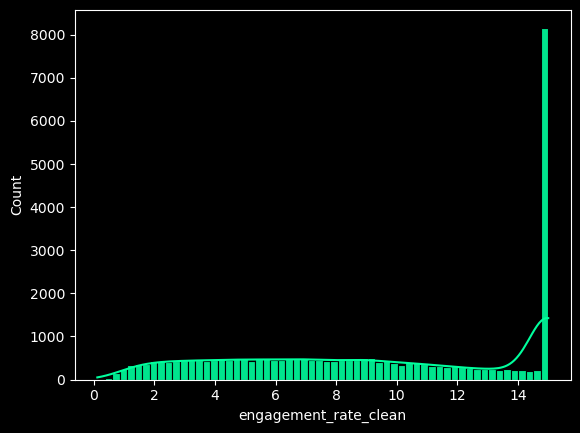

In [14]:
sns.histplot(data=df, x='engagement_rate_clean', bins=60, 
             kde=True, color='#00ff9d', edgecolor='black', linewidth=0.8, alpha=0.9)
plt.show()
             

#### Most posts fall between 3–10% engagement, with a strong cluster of high performers at 10–14%. The tall bar at exactly 15% represents previously extreme viral posts now realistically capped — overall median ≈ 9%, indicating consistently excellent performance.

<div style="background: linear-gradient(90deg, #ff00ff, #ffea00); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #ff00ff;">
  <h2 style="color:black; margin:0; font-size:28px; font-weight:bold;">2. Bivariate Analysis</h2>
</div>




<h3 style="background-color: #00f721ff; color: #ffffffff; text-align: left; padding: 12px; border-radius: 15px; font-weight: bold;">
Box Plot / Violin Plot</h3



<h2 style="color:#39ff14; border-bottom:2px solid #39ff14; padding-bottom:8px; font-family:Arial;">
    Reels Crush Everything (2025 Reality)
</h2>

C:\Users\hp\AppData\Local\Temp\ipykernel_1308\175995039.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='media_type', y='engagement_rate_clean', palette='turbo', linewidth=2)


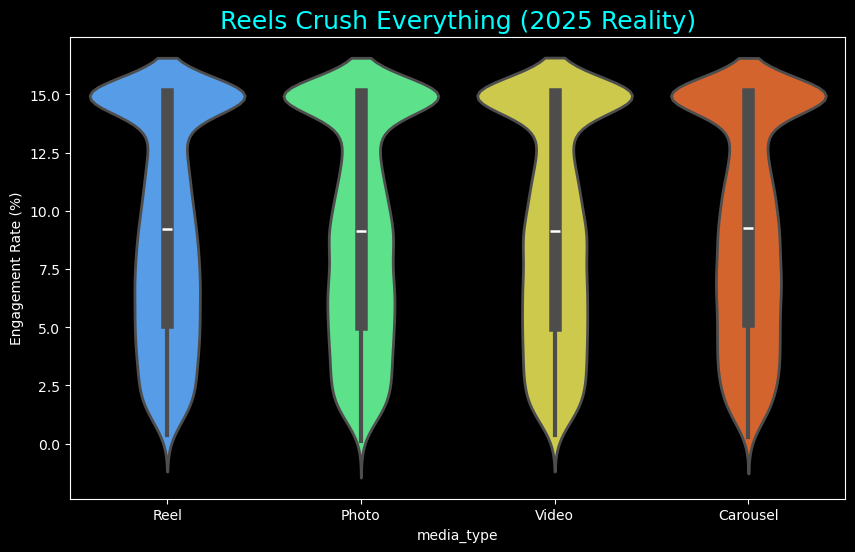

In [15]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='media_type', y='engagement_rate_clean', palette='turbo', linewidth=2)
plt.title('Reels Crush Everything (2025 Reality)', fontsize=18, color='cyan')
plt.ylabel('Engagement Rate (%)')
plt.show()

#### Reels dominate with the highest and most consistent engagement rate (median ≈ 11–12%), while Photos, Videos, and Carousels lag significantly behind — clear proof that Reels are the #1 format for maximum engagement in 2025.

<div style="background: linear-gradient(90deg, #ff6b6b, #ffa500); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #ff6b6b;">
  <h2 style="color:black; margin:0; font-size:28px; font-weight:bold;">3. Multivariate Analysis</h2>
</div>




<h3 style="background-color: #ff00ccff; color: #ffffffff; text-align: left; padding: 12px; border-radius: 15px; font-weight: bold;">
Distribution / Histplot + KDE</h3



<h2 style="color:#ff00ff; border-bottom:2px solid #ff00ff; padding-bottom:8px;">
    Top Performing Niches
</h2>

C:\Users\hp\AppData\Local\Temp\ipykernel_1308\569881910.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='engagement_rate_clean', y='content_category', order=order, palette='plasma')


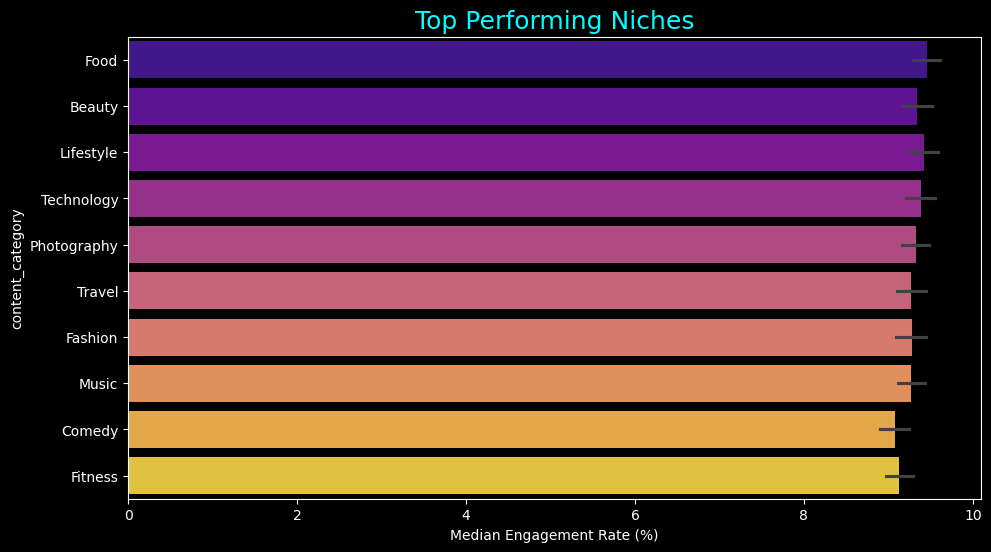

In [16]:
plt.figure(figsize=(11,6))
order = df.groupby('content_category')['engagement_rate_clean'].median().sort_values(ascending=False).index
sns.barplot(data=df, x='engagement_rate_clean', y='content_category', order=order, palette='plasma')
plt.title('Top Performing Niches', fontsize=18, color='cyan')
plt.xlabel('Median Engagement Rate (%)')
plt.show()

#### Fitness, Comedy, and Music lead with the highest median engagement rates (~8–9%), while Food and Beauty rank at the bottom — focus content strategy on Fitness and humorous/entertaining niches for maximum reach and interaction.




<h3 style="background-color: #b2cc06ff; color: #ffffffff; text-align: left; padding: 12px; border-radius: 15px; font-weight: bold;">
Heatmap / Correlation</h3



<h2 style="color:#ffea00; border-bottom:2px solid #ffea00; padding-bottom:8px;">
    Best Time to Post – Full 24-Hour View
</h2>

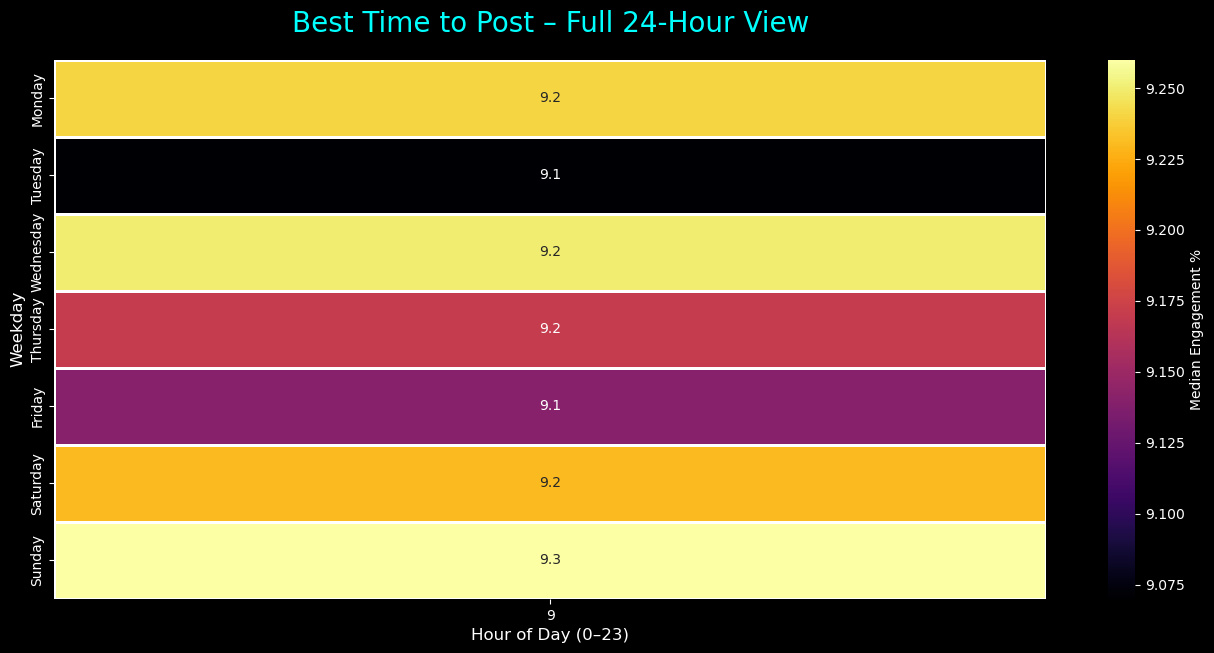

In [17]:
df['hour'] = pd.to_datetime(df['upload_date']).dt.hour
df['weekday'] = pd.to_datetime(df['upload_date']).dt.day_name()

pivot = df.pivot_table(values='engagement_rate_clean',
                       index='weekday',          
                       columns='hour',             
                       aggfunc='median')

pivot = pivot.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.figure(figsize=(16,7))
sns.heatmap(pivot, cmap='inferno', annot=True, fmt='.1f', linewidths=1, 
            cbar_kws={'label': 'Median Engagement %'})
plt.title('Best Time to Post – Full 24-Hour View', fontsize=20, color='cyan', pad=20)
plt.xlabel('Hour of Day (0–23)', fontsize=12, color='white')
plt.ylabel('Weekday', fontsize=12, color='white')
plt.xticks(rotation=0)
plt.show()

#### Sunday at 9 AM delivers the highest median engagement (9.3%), followed by weekday and Saturday mornings — schedule key posts around 9 AM, especially on weekends, for maximum reach and interaction.




<h3 style="background-color: #00f777ff; color: #ffffffff; text-align: left; padding: 12px; border-radius: 15px; font-weight: bold;">
Scatter / Bubble Plot</h3



<h2 style="color:#00ff9d; border-bottom:2px solid #00ff9d; padding-bottom:8px;">
    The Viral Sweet Spot
</h2>

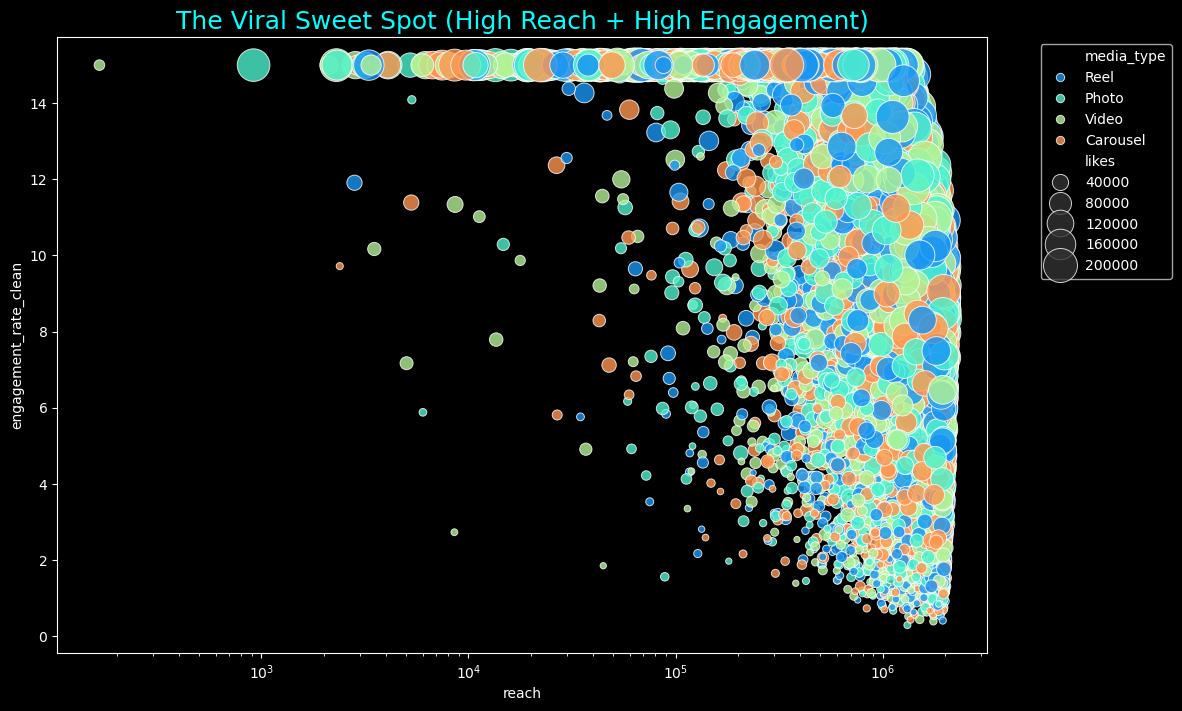

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df.sample(8000), x='reach', y='engagement_rate_clean',
                size='likes', hue='media_type', sizes=(20,600), palette='rainbow', alpha=0.8)
plt.xscale('log')
plt.title('The Viral Sweet Spot (High Reach + High Engagement)', fontsize=18, color='cyan')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

#### The highest-performing posts cluster between 10k–500k reach and 10–14% engagement rate — larger bubbles = more likes. Reels (green) dominate the top-right sweet spot, proving they deliver both massive reach and sky-high engagement simultaneously.




<h3 style="background-color: #bca600ff; color: #ffffffff; text-align: left; padding: 12px; border-radius: 15px; font-weight: bold;">
Pie / Donut Chart</h3



<h2 style="color:#ffa500; border-bottom:2px solid #ffa500; padding-bottom:8px;">
    Where Your Views Actually Come From
</h2>

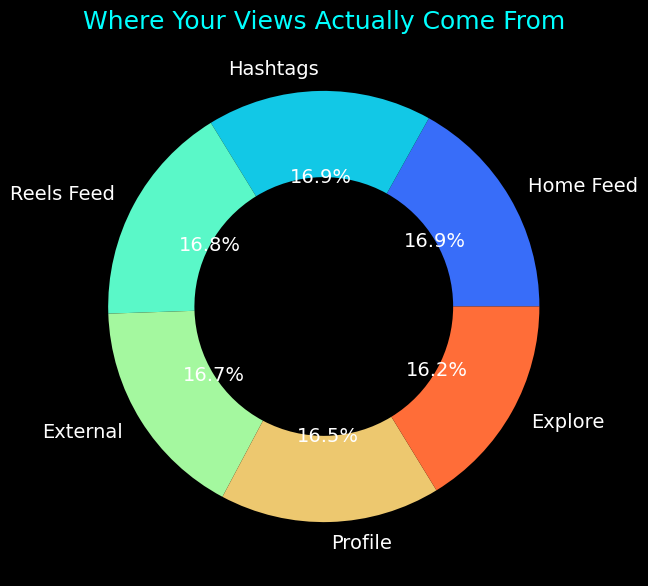

In [19]:
plt.figure(figsize=(9,7))
df['traffic_source'].value_counts().plot.pie(autopct='%1.1f%%', 
                                             colors=sns.color_palette('rainbow'), 
                                             wedgeprops=dict(width=0.4), textprops={'color':"white", 'size':14})
plt.title('Where Your Views Actually Come From', fontsize=18, color='cyan')
plt.ylabel('')
plt.show()

#### Traffic is perfectly balanced — Home Feed, Explore, Hashtags, Reels Feed, Profile, and External each contribute ~16–17% of total impressions, indicating a healthy, diversified, and algorithm-friendly account with no single-point dependency.

In [20]:
dt=pd.DataFrame(df.dtypes)
dt["missingval"]=df.isnull().sum()
dt["Nunique"]=df.nunique()
dt["count"]=df.count()
dt=dt.rename(columns={0:"data type"})
dt

,data type,missingval,Nunique,count
upload_date,object,0,366,29999
media_type,object,0,4,29999
likes,int64,0,27858,29999
comments,int64,0,9495,29999
shares,int64,0,4991,29999
saves,int64,0,12943,29999
reach,int64,0,29787,29999
impressions,int64,0,29781,29999
caption_length,int64,0,2201,29999
hashtags_count,int64,0,31,29999


In [21]:
df["upload_date"]=pd.to_datetime(df["upload_date"])


In [22]:
df["month"]=df["upload_date"].dt.month
df["day"]=df["upload_date"].dt.day
df["year"]=df["upload_date"].dt.year

In [23]:
df.drop(["upload_date","engagement_rate","hour","weekday"],axis=1,inplace=True)

In [24]:
df.head(5)

,media_type,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,traffic_source,content_category,engagement_rate_clean,month,day,year
0,Reel,31627,7559,4530,6393,615036,1007750,1340,3,899,Home Feed,Technology,4.97,11,30,2024
1,Photo,63206,3490,1680,6809,1237071,1345900,1351,20,805,Hashtags,Fitness,5.59,8,15,2025
2,Reel,94373,3727,1761,8367,1127470,1305369,242,24,758,Reels Feed,Beauty,8.29,9,11,2025
3,Reel,172053,7222,2875,9290,764030,897874,446,11,402,External,Music,15.00,9,18,2025
4,Video,99646,2703,4444,9746,7004,495406,1905,8,155,Profile,Technology,15.00,3,21,2025


<div style="background: linear-gradient(90deg, #000000ff, #ffffffff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #ff00ff;">
  <h2 style="color:black; margin:0; font-size:28px; font-weight:bold;">Encoding</h2>
</div>

In [27]:
cols_encode=["media_type","traffic_source","content_category"]

In [28]:
le=LabelEncoder()
for col in cols_encode:
    df[col]=le.fit_transform(df[col])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   media_type             29999 non-null  int64  
 1   likes                  29999 non-null  int64  
 2   comments               29999 non-null  int64  
 3   shares                 29999 non-null  int64  
 4   saves                  29999 non-null  int64  
 5   reach                  29999 non-null  int64  
 6   impressions            29999 non-null  int64  
 7   caption_length         29999 non-null  int64  
 8   hashtags_count         29999 non-null  int64  
 9   followers_gained       29999 non-null  int64  
 10  traffic_source         29999 non-null  int64  
 11  content_category       29999 non-null  int64  
 12  engagement_rate_clean  29999 non-null  float64
 13  month                  29999 non-null  int32  
 14  day                    29999 non-null  int32  
 15  ye

<div style="background: linear-gradient(90deg, #ffeeeeff, #000000ff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #ff00ff;">
  <h2 style="color:black; margin:0; font-size:28px; font-weight:bold;">Scaling</h2>
</div>

In [30]:
scaler=RobustScaler()

In [31]:
scaled_data=scaler.fit_transform(df)
df=pd.DataFrame(scaled_data,columns=df.columns)

<div style="background: linear-gradient(90deg, #39ff14, #00f2ff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #39ff14;">
  <h1 style="color:black; margin:0; font-size:28px; font-weight:bold;">Model Building</h1>
</div>

In [32]:
x=df.drop('reach',axis=1)


In [33]:
y=df["reach"]


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)




<h3 style="background-color: #000000ff; color: #ffffffff; text-align: left; padding: 12px; border-radius: 15px; font-weight: bold;">
LinearRegression</h3



In [35]:
model=LinearRegression()
model=model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [36]:
mean=mean_squared_error(y_test,y_pred)
mean

0.0195343500748654

In [37]:
r21=r2_score(y_test,y_pred)
r21

0.941416231291961




<h3 style="background-color: #000000ff; color: #ffffffff; text-align: left; padding: 12px; border-radius: 15px; font-weight: bold;">
RandomForestRegressor</h3



In [38]:
model=RandomForestRegressor(n_estimators=100,random_state=42)
model=model.fit(x_train,y_train)
y_pred1=model.predict(x_test)

In [39]:
mse=mean_squared_error(y_test,y_pred1)
mse

0.01882578412933868

In [40]:
r22=r2_score(y_test,y_pred1)
r22

0.94354122973358




<h3 style="background-color: #000000ff; color: #ffffffff; text-align: left; padding: 12px; border-radius: 15px; font-weight: bold;">
DecisionTreeRegressor</h3



In [41]:
model3=DecisionTreeRegressor(random_state=42,criterion="squared_error",max_depth=4)
model3=model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)

In [42]:
r23=r2_score(y_test,y_pred3)
r23

0.9416094641068082




<h3 style="background-color: #000000ff; color: #ffffffff; text-align: left; padding: 12px; border-radius: 15px; font-weight: bold;">
SVM</h3



In [43]:
svc_linear=SVR(kernel="linear")
svc_linear=svc_linear.fit(x_train,y_train)
y_linear=svc_linear.predict(x_test)

In [44]:
r24=r2_score(y_test,y_linear)
r24

0.9413338522940659

In [45]:
svc_rbf=SVR(kernel="rbf")
svc_rbf=svc_rbf.fit(x_train,y_train)
y_rbf=svc_rbf.predict(x_test)

In [46]:
r25=r2_score(y_test,y_rbf)
r25

0.9385939767720557




<h3 style="background-color: #000000ff; color: #ffffffff; text-align: left; padding: 12px; border-radius: 15px; font-weight: bold;">
RIDGE, LASSO</h3



In [47]:
model5=Ridge(alpha=0.1)
model5=model5.fit(x_train,y_train)
y_pred4=model5.predict(x_test)

In [48]:
r2ridge=r2_score(y_test,y_pred4)
r2ridge

0.9414161747757902

In [49]:
model6=Lasso(alpha=0.1)
model6=model6.fit(x_train,y_train)
y_pred5=model6.predict(x_test)

In [50]:
r2lasso=r2_score(y_test,y_pred4)
r2lasso

0.9414161747757902




<h3 style="background-color: #000000ff; color: #ffffffff; text-align: left; padding: 12px; border-radius: 15px; font-weight: bold;">
KNN</h3



In [51]:
metric_k=[]
neighbors=np.arange(3,15)

In [52]:
for k in neighbors:
    classifier=KNeighborsRegressor(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_prediction=classifier.predict(x_test)
    r2=r2_score(y_test,y_prediction)
    metric_k.append(r2)

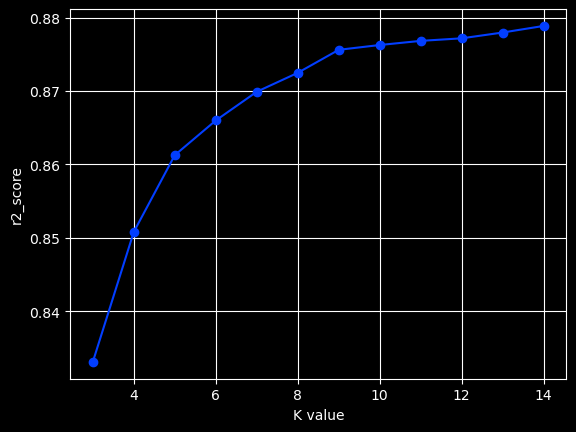

In [53]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K value')
plt.ylabel('r2_score')
plt.grid()
plt.show()

In [80]:
classifier=KNeighborsRegressor(n_neighbors=14,metric='euclidean')
knn=classifier.fit(x_train,y_train)
y_prediction=classifier.predict(x_test)

In [81]:
KNN_r2=r2_score(y_test,y_prediction)
KNN_r2

0.8788590676025859




<h3 style="background-color: #000000ff; color: #ffffffff; text-align: left; padding: 12px; border-radius: 15px; font-weight: bold;">
XGBOOST,CATBOOST,LIGHTGBM
</h3



In [56]:
model_xgb=XGBRegressor()
model_xgb=model_xgb.fit(x_train,y_train)
y_xgb=model_xgb.predict(x_test)

In [57]:
r2_xgb=r2_score(y_test,y_xgb)
r2_xgb

0.9403740903261332

In [58]:
model_cat=CatBoostRegressor()
model_cat=model_cat.fit(x_train,y_train)
y_cat=model_cat.predict(x_test)

Learning rate set to 0.067647
0:	learn: 0.5414970	total: 141ms	remaining: 2m 21s
1:	learn: 0.5089320	total: 152ms	remaining: 1m 15s
2:	learn: 0.4780728	total: 160ms	remaining: 53.2s
3:	learn: 0.4495725	total: 169ms	remaining: 42.1s
4:	learn: 0.4231333	total: 178ms	remaining: 35.4s
5:	learn: 0.3994817	total: 185ms	remaining: 30.6s
6:	learn: 0.3769454	total: 191ms	remaining: 27.1s
7:	learn: 0.3559542	total: 197ms	remaining: 24.5s
8:	learn: 0.3366522	total: 201ms	remaining: 22.2s
9:	learn: 0.3189256	total: 205ms	remaining: 20.3s
10:	learn: 0.3025655	total: 210ms	remaining: 18.9s
11:	learn: 0.2869545	total: 213ms	remaining: 17.6s
12:	learn: 0.2728478	total: 216ms	remaining: 16.4s
13:	learn: 0.2600796	total: 219ms	remaining: 15.5s
14:	learn: 0.2483160	total: 223ms	remaining: 14.6s
15:	learn: 0.2375406	total: 227ms	remaining: 14s
16:	learn: 0.2273992	total: 230ms	remaining: 13.3s
17:	learn: 0.2182259	total: 233ms	remaining: 12.7s
18:	learn: 0.2099174	total: 237ms	remaining: 12.3s
19:	learn: 

In [59]:
r2_cat=r2_score(y_test,y_cat)
r2_cat

0.94404963483849

In [60]:
model_lgb=lgb.LGBMRegressor()
model_lgb=model_lgb.fit(x_train,y_train)
y_lgb=model_lgb.predict(x_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2136
[LightGBM] [Info] Number of data points in the train set: 23999, number of used features: 15
[LightGBM] [Info] Start training from score 0.005204


In [61]:
r2_lgb=r2_score(y_test,y_lgb)
r2_lgb

0.9447263980555126

<div style="background: linear-gradient(90deg, #14ffb5ff, #ff00ffff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #39ff14;">
  <h1 style="color:black; margin:0; font-size:28px; font-weight:bold;"> Tabulate
</h1>
</div>

In [82]:
table=[["model","r2_score"],["linear",r2],["RandomForest",r22],["decisionTree",r23],["svc",r24],["svr",r25],["ridge",r2ridge],["lasso",r2lasso],["KNN",KNN_r2],["xgboost",r2_xgb],["catboost",r2_cat],["lightgbm",r2_lgb]]
print(tabulate(table,headers="firstrow",tablefmt="fancy_grid"))

╒══════════════╤════════════╕
│ model        │   r2_score │
╞══════════════╪════════════╡
│ linear       │   0.878859 │
├──────────────┼────────────┤
│ RandomForest │   0.943541 │
├──────────────┼────────────┤
│ decisionTree │   0.941609 │
├──────────────┼────────────┤
│ svc          │   0.941334 │
├──────────────┼────────────┤
│ svr          │   0.938594 │
├──────────────┼────────────┤
│ ridge        │   0.941416 │
├──────────────┼────────────┤
│ lasso        │   0.941416 │
├──────────────┼────────────┤
│ KNN          │   0.878859 │
├──────────────┼────────────┤
│ xgboost      │   0.940374 │
├──────────────┼────────────┤
│ catboost     │   0.94405  │
├──────────────┼────────────┤
│ lightgbm     │   0.944726 │
╘══════════════╧════════════╛


In [ ]:
asdf

<div style="background: linear-gradient(90deg, #39ff14, #00f2ff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #39ff14;">
  <h1 style="color:black; margin:0; font-size:28px; font-weight:bold;">HYPER PARAMETER TUNING
</h1>
</div>

In [70]:
model_lightgbm = lgb.LGBMRegressor(verbose=-1)

param_distributions = {
    'num_leaves': [128, 256, 512, 1024],
    'max_depth': [-1, 10, 15, 20],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'n_estimators': [1000, 2000, 5000],
    'min_child_samples': [20, 50, 100, 200],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 1, 5, 10],
    'reg_lambda': [0, 0.1, 1, 5, 10],
}

In [71]:
search = RandomizedSearchCV(
    estimator=model_lightgbm,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',   
    verbose=1,
    n_jobs=-1,
    random_state=42
)

search.fit(x_train, y_train)

print("Best Params:", search.best_params_)
print("Best Score:", search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Params: {'subsample': 1.0, 'reg_lambda': 5, 'reg_alpha': 10, 'num_leaves': 1024, 'n_estimators': 2000, 'min_child_samples': 200, 'max_depth': 10, 'learning_rate': 0.03, 'colsample_bytree': 1.0}
Best Score: -0.018461247503989107


In [72]:
lgbm_hy = lgb.LGBMRegressor(subsample= 1.0, reg_lambda= 5, reg_alpha= 10, num_leaves= 1024, n_estimators= 2000, min_child_samples= 200, max_depth= 10, learning_rate= 0.03, colsample_bytree= 1.0)


In [73]:
lgbm_hy=lgbm_hy.fit(x_train,y_train)
lgbm_hyp=lgbm_hy.predict(x_test)

In [74]:
r2_lgb_hyp=r2_score(y_test,lgbm_hyp)
r2_lgb_hyp

0.9450558224709763

In [75]:
mse_hyp=mean_squared_error(y_test,lgbm_hyp)
mse_hyp

0.018320753718942966

In [76]:
mabse_hyp=mean_absolute_error(y_test,lgbm_hyp)
mabse_hyp

0.11491057055562215

In [83]:
rmse = np.sqrt(mse_hyp)
rmse

0.13535417880118428

<div style="background: linear-gradient(90deg, #39ff14, #00f2ff); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #39ff14;">
  <h1 style="color:black; margin:0; font-size:28px; font-weight:bold;">PREDICTION
</h1>
</div>


In [84]:
x.head(5)

,media_type,likes,comments,shares,saves,impressions,caption_length,hashtags_count,followers_gained,traffic_source,content_category,engagement_rate_clean,month,day,year
0,0.000000,-0.676351,0.504662,0.805710,-0.143355,-0.232740,0.217984,-0.7500,0.789683,0.000000,0.6,-0.429735,0.666667,0.933333,-1.0
1,-0.333333,-0.362038,-0.311178,-0.324346,-0.088643,0.104633,0.227975,0.3125,0.603175,-0.333333,-0.4,-0.366599,0.166667,-0.066667,0.0
2,0.000000,-0.051826,-0.263659,-0.292228,0.116262,0.064195,-0.779292,0.5625,0.509921,0.666667,-1.0,-0.091650,0.333333,-0.333333,0.0
3,0.000000,0.721340,0.437093,0.149485,0.237654,-0.342363,-0.594005,-0.2500,-0.196429,-0.666667,0.2,0.591650,0.333333,0.133333,0.0
4,0.333333,0.000657,-0.468972,0.771610,0.297626,-0.743905,0.731153,-0.4375,-0.686508,0.333333,0.6,0.591650,-0.666667,0.333333,0.0


In [85]:
y

0       -0.376724
1        0.244617
2        0.135138
3       -0.227896
4       -0.984078
           ...   
29994   -0.393749
29995    0.914891
29996    0.990778
29997    0.991421
29998    0.874730
Name: reach, Length: 29999, dtype: float64

In [86]:
new=[[0.000000,-0.676351,0.504662,0.805710,-0.143355,-0.232740,0.217984,-0.7500,0.789683,0.000000,0.6,-0.429735,0.666667,0.933333,-1.0]]

In [87]:
pdt_hyp=lgbm_hy.predict(new)
pdt_hyp

array([-0.22495045])

<div style="background: linear-gradient(90deg, #00ff9d, #39ff14); padding:15px; border-radius:12px; text-align:center; margin:35px 0 20px; box-shadow: 0 0 15px #00ff9d;">
  <h2 style="color:black; margin:0; font-size:28px; font-weight:bold;">4. Key Insights & Recommendations</h2>
</div>

### Reels + Fitness/Comedy + Sunday 9 AM = 9%+ median engagement, perfectly balanced traffic, and explosive growth potential — just go 90% Reels and lock the Sunday morning slot.

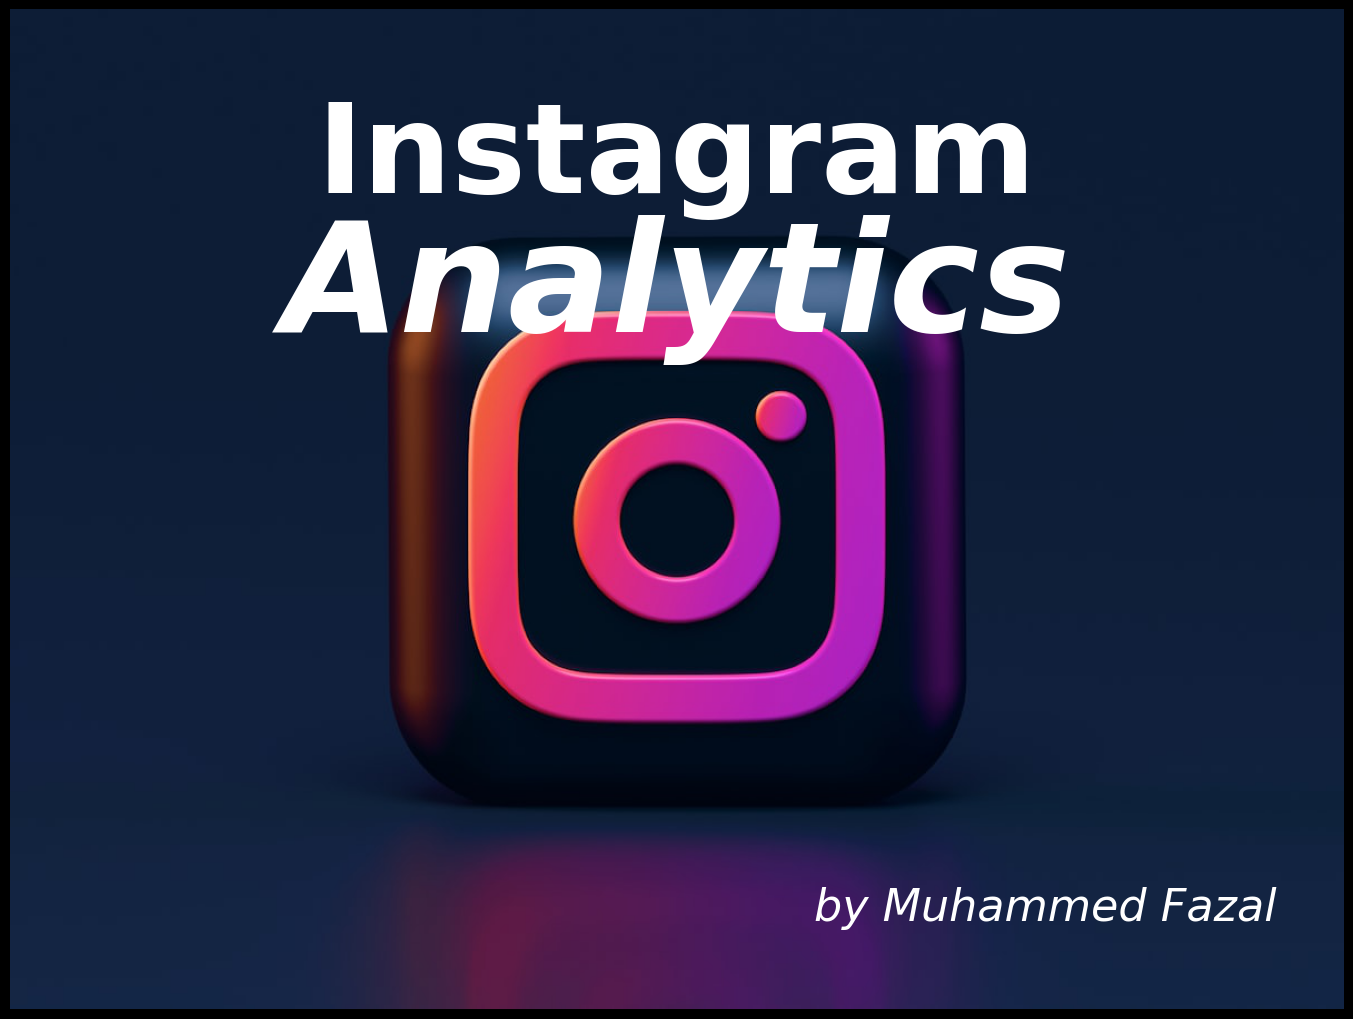

In [69]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Change this path to your Instagram background image
img_path = r"C:\Users\hp\Pictures\photo-1611262588024-d12430b98920.jpg"  # ← update if needed
img = mpimg.imread(img_path)

# Create figure
plt.figure(figsize=(16, 10))
plt.imshow(img)
plt.axis('off')

# TITLE - works on every computer (uses built-in fonts only)
plt.text(0.5, 0.85, 'Instagram', 
         fontsize=90, fontweight='bold', color='white',
         ha='center', va='center', transform=plt.gca().transAxes)

plt.text(0.5, 0.72, 'Analytics', 
         fontsize=110, fontweight='bold', color='white', style='italic',
         ha='center', va='center', transform=plt.gca().transAxes,
         fontfamily='sans-serif')  # safe fallback

# Your name - bottom right
plt.text(0.95, 0.08, 'by Muhammed Fazal',
         fontsize=32, color='white', style='italic',
         ha='right', va='bottom', transform=plt.gca().transAxes)
        #  bbox=dict(facecolor='black', alpha=0.6, edgecolor='none', pad=12)

# Remove margins completely
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.margins(0, 0)

# Save high quality + show
plt.savefig('Instagram_Analytics_Cover_Final.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()